In [1]:
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd

connection = mysql.connector.connect(
user='root',
password='aloore@22',
database= 'test_results')

cursor = connection.cursor()

In [2]:

personal_information = "SELECT * FROM personal_information"
cursor.execute(personal_information)
cursor.fetchall()

tetime.date(2020, 4, 30), 'None', 'male', 'negative'),
 (696, datetime.date(2020, 4, 30), 'None', 'male', 'negative'),
 (697, datetime.date(2020, 4, 30), 'None', 'female', 'negative'),
 (698, datetime.date(2020, 4, 30), 'None', 'female', 'negative'),
 (699, datetime.date(2020, 4, 30), 'None', 'female', 'negative'),
 (700, datetime.date(2020, 4, 30), 'None', 'female', 'negative'),
 (701, datetime.date(2020, 4, 30), 'None', 'female', 'negative'),
 (702, datetime.date(2020, 4, 30), 'None', 'female', 'negative'),
 (703, datetime.date(2020, 4, 30), 'None', 'female', 'negative'),
 (704, datetime.date(2020, 4, 30), 'None', 'male', 'negative'),
 (705, datetime.date(2020, 4, 30), 'None', 'female', 'negative'),
 (706, datetime.date(2020, 4, 30), 'None', 'male', 'negative'),
 (707, datetime.date(2020, 4, 30), 'None', 'female', 'negative'),
 (708, datetime.date(2020, 4, 30), 'None', 'male', 'negative'),
 (709, datetime.date(2020, 4, 30), 'None', 'female', 'negative'),
 (710, datetime.date(2020, 4,

In [3]:
# Importing useful libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


In [6]:
#skapar en dataframe med personal_information tabellen.
personal = pd.read_sql('SELECT * FROM personal_information', con = connection)
personal.head()

,personal_id,test_date,age_60_and_above,gender,corona_result
0,1,2020-04-30,None,female,negative
1,2,2020-04-30,None,female,negative
2,3,2020-04-30,None,male,negative
3,4,2020-04-30,None,female,negative
4,5,2020-04-30,None,male,negative


In [7]:
#skapar en dataframe med symptoms tabellen.
symptoms = pd.read_sql('SELECT * FROM symptoms', con = connection)
symptoms.head()

,symptoms_id,personal_id,cough,fever,shortness_of_breath,sore_throat,head_ache,test_indication
0,1,1,0,0,0,0,0,Other
1,2,2,1,0,0,0,0,Other
2,3,3,0,1,0,0,0,Other
3,4,4,1,0,0,0,0,Other
4,5,5,1,0,0,0,0,Other


In [8]:
#skapar en ny dataframe med båda tabbelerna tillsammans.
default = pd.concat([personal,symptoms], axis = 1)

In [9]:
default.head()

,personal_id,test_date,age_60_and_above,gender,corona_result,symptoms_id,personal_id,cough,fever,shortness_of_breath,sore_throat,head_ache,test_indication
0,1,2020-04-30,None,female,negative,1.0,1.0,0,0,0,0,0,Other
1,2,2020-04-30,None,female,negative,2.0,2.0,1,0,0,0,0,Other
2,3,2020-04-30,None,male,negative,3.0,3.0,0,1,0,0,0,Other
3,4,2020-04-30,None,female,negative,4.0,4.0,1,0,0,0,0,Other
4,5,2020-04-30,None,male,negative,5.0,5.0,1,0,0,0,0,Other


In [10]:
#droppar personal_id samt symptoms_id, för det inte behövs.
default.drop(['personal_id','symptoms_id'], axis='columns',inplace = True)
default.head()

,test_date,age_60_and_above,gender,corona_result,cough,fever,shortness_of_breath,sore_throat,head_ache,test_indication
0,2020-04-30,None,female,negative,0,0,0,0,0,Other
1,2020-04-30,None,female,negative,1,0,0,0,0,Other
2,2020-04-30,None,male,negative,0,1,0,0,0,Other
3,2020-04-30,None,female,negative,1,0,0,0,0,Other
4,2020-04-30,None,male,negative,1,0,0,0,0,Other


In [11]:
#se vilka dtypes dem har.
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            278848 non-null  object
 1   age_60_and_above     278848 non-null  object
 2   gender               278848 non-null  object
 3   corona_result        278848 non-null  object
 4   cough                278594 non-null  object
 5   fever                278594 non-null  object
 6   shortness_of_breath  278594 non-null  object
 7   sore_throat          278594 non-null  object
 8   head_ache            278594 non-null  object
 9   test_indication      278594 non-null  object
dtypes: object(10)
memory usage: 21.3+ MB


In [12]:
#tar en djupare titt på vad de unika värden är.
print(default['cough'].unique())
print(default['fever'].unique())
print(default['sore_throat'].unique())
print(default['shortness_of_breath'].unique())
print(default['head_ache'].unique())
print(default['corona_result'].unique())
print(default['age_60_and_above'].unique())
print(default['gender'].unique())
print(default['test_indication'].unique())

['0' '1' nan]
['0' '1' nan]
['0' '1' nan]
['0' '1' nan]
['0' '1' nan]
['negative' 'positive' 'other']
['None' 'Yes' 'No']
['female' 'male' 'None']
['Other' 'Abroad' 'Contact with confirmed' nan]


In [13]:
#gör om till dummy-varibaler.
default = pd.concat([default, pd.get_dummies(default['head_ache'], prefix='head_ache', drop_first=True)],axis=1)
default = pd.concat([default, pd.get_dummies(default['shortness_of_breath'], prefix='shortness_of_breath', drop_first=True)],axis=1)
default = pd.concat([default, pd.get_dummies(default['sore_throat'], prefix='sore_throat', drop_first=True)],axis=1)
default = pd.concat([default, pd.get_dummies(default['fever'], prefix='fever', drop_first=True)],axis=1)
default = pd.concat([default, pd.get_dummies(default['cough'], prefix='cough', drop_first=True)],axis=1)
default = pd.concat([default, pd.get_dummies(default['corona_result'], prefix='corona_result', drop_first=True)],axis=1)
default = pd.concat([default, pd.get_dummies(default['gender'], prefix='gender', drop_first=True)],axis=1)
default = pd.concat([default, pd.get_dummies(default['test_indication'], prefix='test_indication', drop_first=True)],axis=1)

In [14]:
default.head()

,test_date,age_60_and_above,gender,corona_result,cough,fever,shortness_of_breath,sore_throat,head_ache,test_indication,...,shortness_of_breath_1,sore_throat_1,fever_1,cough_1,corona_result_other,corona_result_positive,gender_female,gender_male,test_indication_Contact with confirmed,test_indication_Other
0,2020-04-30,None,female,negative,0,0,0,0,0,Other,...,0,0,0,0,0,0,1,0,0,1
1,2020-04-30,None,female,negative,1,0,0,0,0,Other,...,0,0,0,1,0,0,1,0,0,1
2,2020-04-30,None,male,negative,0,1,0,0,0,Other,...,0,0,1,0,0,0,0,1,0,1
3,2020-04-30,None,female,negative,1,0,0,0,0,Other,...,0,0,0,1,0,0,1,0,0,1
4,2020-04-30,None,male,negative,1,0,0,0,0,Other,...,0,0,0,1,0,0,0,1,0,1


In [15]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 21 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   test_date                               278848 non-null  object
 1   age_60_and_above                        278848 non-null  object
 2   gender                                  278848 non-null  object
 3   corona_result                           278848 non-null  object
 4   cough                                   278594 non-null  object
 5   fever                                   278594 non-null  object
 6   shortness_of_breath                     278594 non-null  object
 7   sore_throat                             278594 non-null  object
 8   head_ache                               278594 non-null  object
 9   test_indication                         278594 non-null  object
 10  head_ache_1                             278848 non-null 

In [16]:
#tittar så inte Nan är med i de ny columner.
print(default['cough_1'].unique())
print(default['fever_1'].unique())
print(default['head_ache_1'].unique())
print(default['shortness_of_breath_1'].unique())
print(default['sore_throat_1'].unique())

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [17]:
#gör en rename på de nya columner som kommer att användas.
default =default.rename(columns ={'cough_1': 'new_cough','fever_1':'new_fever','sore_throat_1':'new_sore_throat','shortness_of_breath_1':'new_shortness_of_breath','head_ache_1':'new_head_ache','corona_result_positive':'new_corona_result'}, inplace = False)

In [18]:
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 21 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   test_date                               278848 non-null  object
 1   age_60_and_above                        278848 non-null  object
 2   gender                                  278848 non-null  object
 3   corona_result                           278848 non-null  object
 4   cough                                   278594 non-null  object
 5   fever                                   278594 non-null  object
 6   shortness_of_breath                     278594 non-null  object
 7   sore_throat                             278594 non-null  object
 8   head_ache                               278594 non-null  object
 9   test_indication                         278594 non-null  object
 10  new_head_ache                           278848 non-null 

In [19]:
#skapar en serie för att få en djupare förstålse hur columnen ser ut.
df_result = default.groupby('new_corona_result').size()
df_result

new_corona_result
0    264119
1     14729
dtype: int64

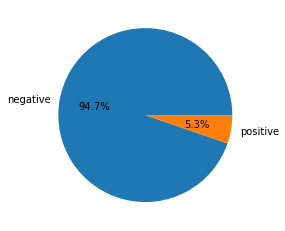

In [20]:
# skapar en plot med varibalen df_result för att se updelningen i %
plt.pie(df_result.values, labels = ['negative','positive'], autopct ='%1.1f%%')
plt.show()

In [21]:
#skapar en serie med sambandet mellan gender och corona resultat.
df_gender = default.groupby(['gender_male','new_corona_result']).size()
df_gender

gender_male  new_corona_result
0            0                    142511
             1                      7210
1            0                    121608
             1                      7519
dtype: int64

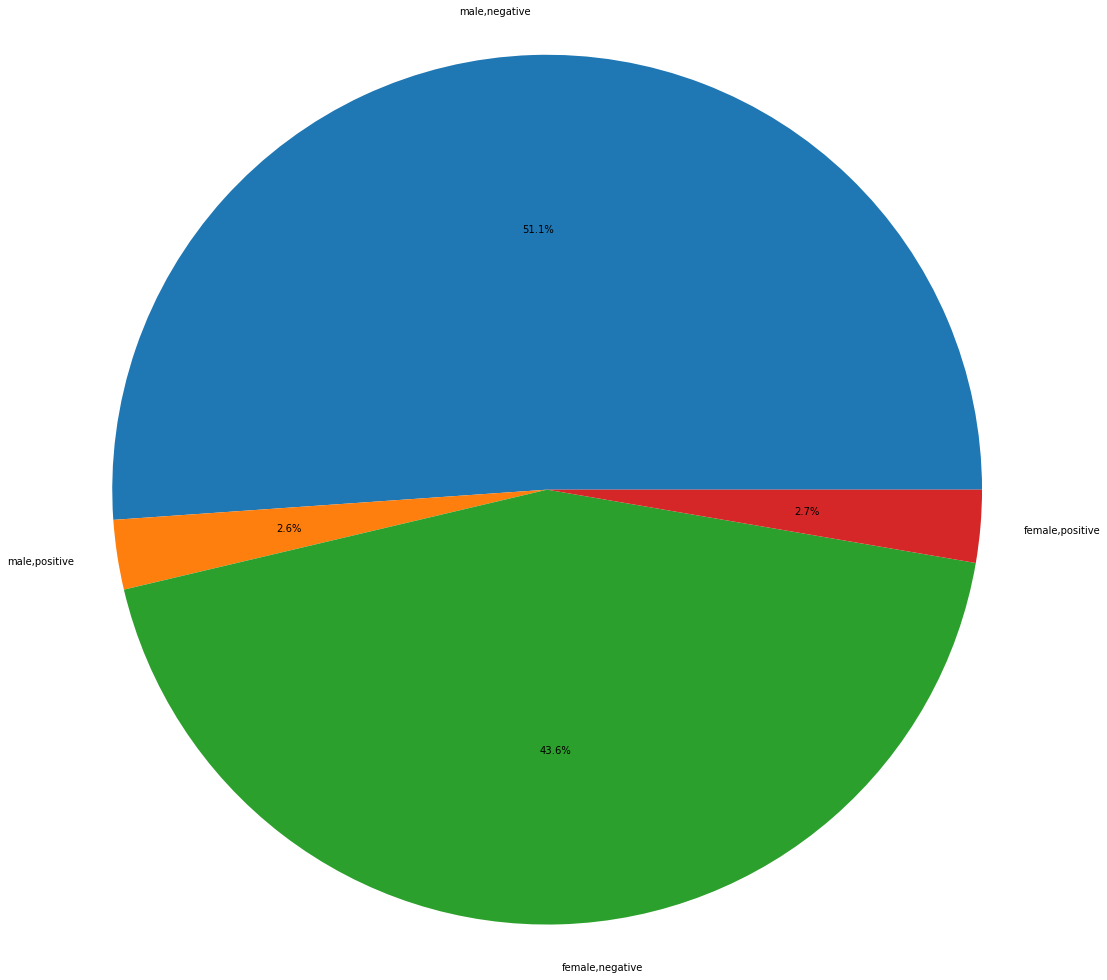

In [22]:
#en plot som förklarar hur många procent respektive kön har fått för resultat från sina tester.
plt.pie(df_gender.values, labels =['male,negative','male,positive','female,negative','female,positive'], autopct ='%1.1f%%',radius = 5)
plt.show()

In [23]:
#en serie som sparas i en variabel som förklarar sambandet mellan symtomen hosta med corona resultat.
df_cough = default.groupby(['new_cough','new_corona_result']).size()
df_cough

new_cough  new_corona_result
0          0                    225538
           1                     11084
1          0                     38581
           1                      3645
dtype: int64

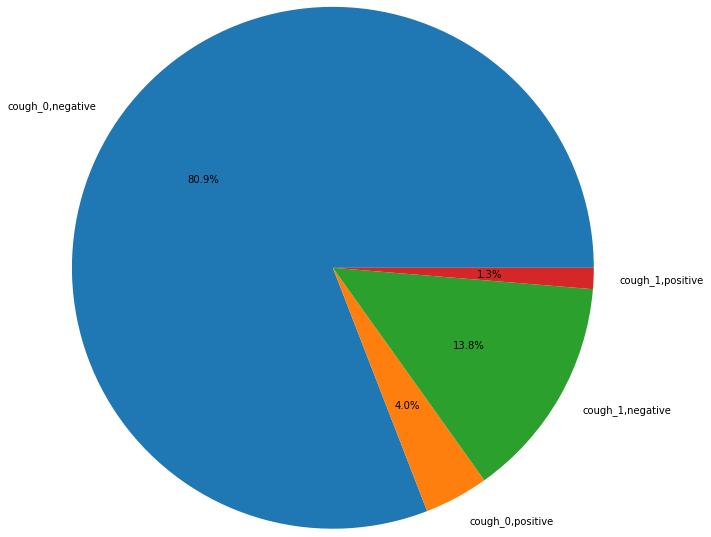

In [24]:
#plot som förklarar sambandet mellan hosta och resultatet från corona testerna.
plt.pie(df_cough.values, labels =['cough_0,negative','cough_0,positive','cough_1,negative','cough_1,positive'], autopct ='%1.1f%%', radius = 3)
plt.show()

In [25]:
df_fever =  default.groupby(['new_fever','new_corona_result']).size()
df_fever

new_fever  new_corona_result
0          0                    244813
           1                     12284
1          0                     19306
           1                      2445
dtype: int64

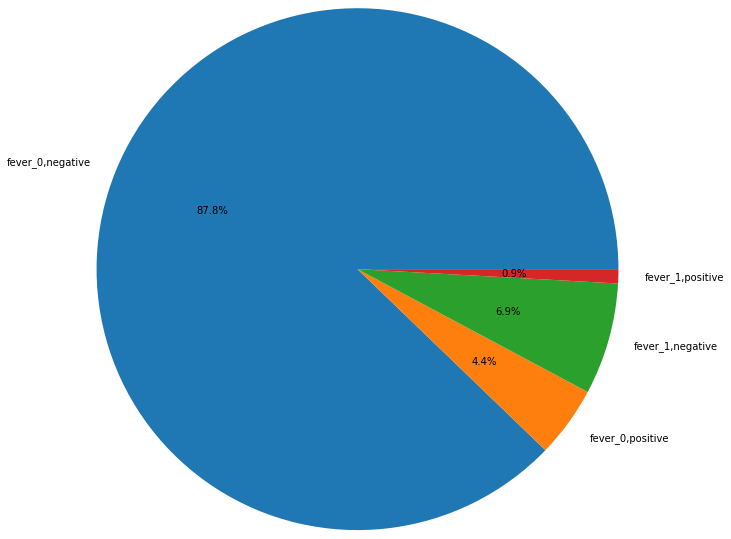

In [26]:
plt.pie(df_fever.values, labels =['fever_0,negative','fever_0,positive','fever_1,negative','fever_1,positive'], autopct ='%1.1f%%', radius = 3)
plt.show()

In [27]:
df_sore_throat =  default.groupby(['new_sore_throat','new_corona_result']).size()
df_sore_throat

new_sore_throat  new_corona_result
0                0                    262637
                 1                     14289
1                0                      1482
                 1                       440
dtype: int64

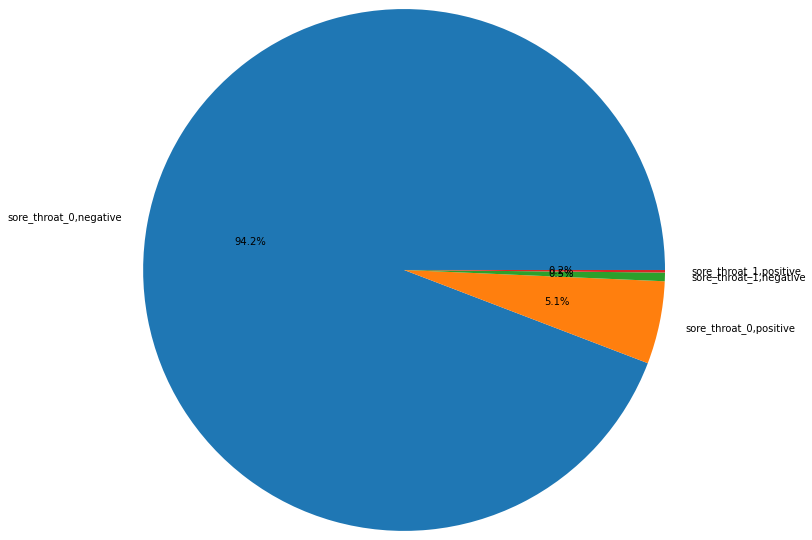

In [28]:
plt.pie(df_sore_throat.values, labels =['sore_throat_0,negative','sore_throat_0,positive','sore_throat_1,negative','sore_throat_1,positive'], autopct ='%1.1f%%', radius = 3)
plt.show()

In [29]:
df_shortness_of_breath =  default.groupby(['new_shortness_of_breath','new_corona_result']).size()
df_shortness_of_breath

new_shortness_of_breath  new_corona_result
0                        0                    262860
                         1                     14414
1                        0                      1259
                         1                       315
dtype: int64

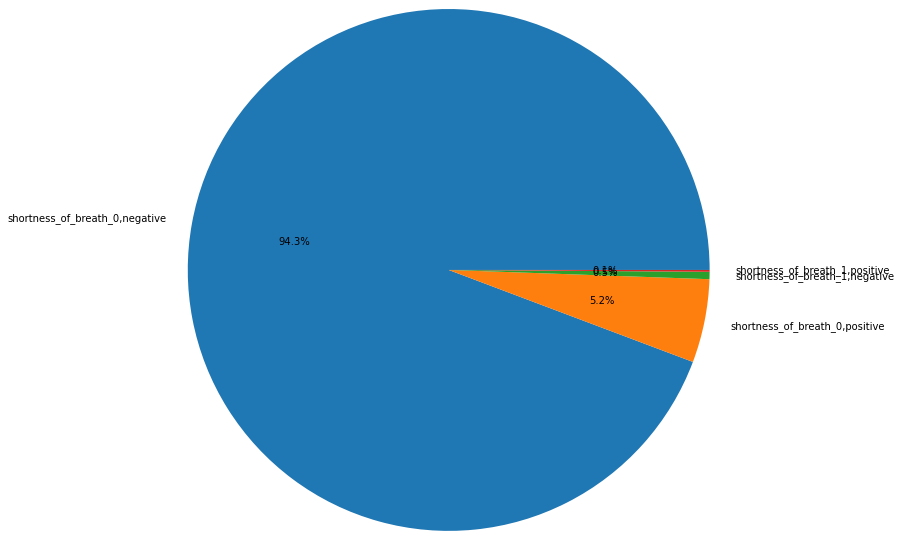

In [30]:
plt.pie(df_shortness_of_breath.values, labels =['shortness_of_breath_0,negative','shortness_of_breath_0,positive','shortness_of_breath_1,negative','shortness_of_breath_1,positive'], autopct ='%1.1f%%', radius = 3)
plt.show()

In [31]:
df_head_ache =  default.groupby(['new_head_ache','new_corona_result']).size()
df_head_ache

new_head_ache  new_corona_result
0              0                    262312
               1                     14128
1              0                      1807
               1                       601
dtype: int64

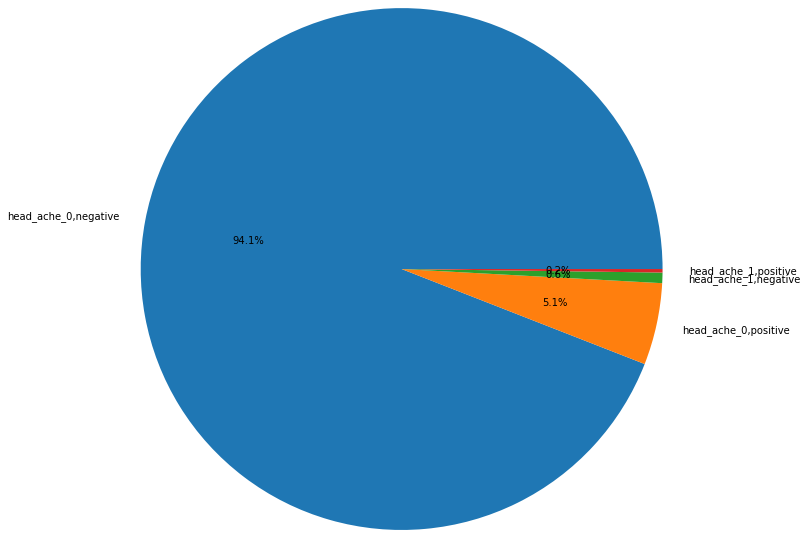

In [32]:
plt.pie(df_head_ache.values, labels =['head_ache_0,negative','head_ache_0,positive','head_ache_1,negative','head_ache_1,positive'], autopct ='%1.1f%%', radius = 3)
plt.show()

In [33]:
from sklearn.utils import resample

In [34]:
#resamplat om target 'result' då den var obalancerad.
df_major =default[default.new_corona_result == 0]
df_minor =default[default.new_corona_result == 1]
df_minor_upsampel = resample(df_minor, replace =True,n_samples = 264119, random_state =123)

df_upsampled =pd.concat([df_major,df_minor_upsampel])

In [35]:
#gör en groupby för att se så att columnen value är lika.
df_new_result = df_upsampled.groupby('new_corona_result').size()
df_new_result

new_corona_result
0    264119
1    264119
dtype: int64

In [36]:
# Prepare Data
target_name = 'new_corona_result'
topp_features = ['new_cough','new_fever', 'new_sore_throat', 'new_shortness_of_breath', 'new_head_ache', 'test_indication_Contact with confirmed']
X = df_upsampled[topp_features]
y = df_upsampled[target_name]

In [37]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=55,stratify=y)

In [38]:
#Building  Modell
def CMatrix(CM, result=['negative','positive']):
    df = pd.DataFrame(data=CM, index=result, columns=result)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [39]:
# Data frame for evaluation metrics
metrics = pd.DataFrame(index=['accuracy', 'precision' ,'recall'], 
                      columns=['LogisticReg', 'Bagging', 'RandomForest', 'Boosting'])

**In this application:**
- **Accuracy**: Overall how often the model predicts correctly negatives(0's) and positives (1's)
- **Precision**: When the model predicts **positives**: how often is correct?
- **Recall**: The proportion of **actual positives** that the model will correctly predict as such


## A. Logistic Regression

In [40]:
# 2. Create an instance of the estimator
logistic_regression = LogisticRegression(random_state =12)

# 3. Use the trainning data to train the estimator
logistic_regression.fit(X_train, y_train)
# 4. Evaluate the model
y_pred_test = logistic_regression.predict(X_test)
metrics.loc['accuracy','LogisticReg'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','LogisticReg'] = recall_score(y_pred=y_pred_test, y_true=y_test)
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,negative,positive,Total
TRUE,,,
negative,35866,3752,39618
positive,24757,14861,39618
Total,60623,18613,79236


## B. Bagging

In [42]:
# 2. Create an instance of the estimator
log_reg_for_bagging = LogisticRegression()
bagging = BaggingClassifier(base_estimator=log_reg_for_bagging, n_estimators=10,random_state=12,
                            n_jobs=-1)

# 3. Use the trainning data to train the estimator
bagging.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_test = bagging.predict(X_test)
metrics.loc['accuracy','Bagging'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','Bagging'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','Bagging'] = recall_score(y_pred=y_pred_test, y_true=y_test)
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,negative,positive,Total
TRUE,,,
negative,35866,3752,39618
positive,24757,14861,39618
Total,60623,18613,79236


## C. Random Forests

In [43]:
# 2. Create an instance of the estimator
RF = RandomForestClassifier(n_estimators=35, max_depth=20,random_state = 12, max_features='sqrt',n_jobs=-1)

# 3. Use the trainning data to train the estimator
RF.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_test = RF.predict(X_test)
metrics.loc['accuracy','RandomForest'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','RandomForest'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','RandomForest'] = recall_score(y_pred=y_pred_test, y_true=y_test)
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,negative,positive,Total
TRUE,,,
negative,35868,3750,39618
positive,24757,14861,39618
Total,60625,18611,79236


## D. Boosting

In [44]:
# 2. Create an instance of the estimator
boosting = AdaBoostClassifier(n_estimators=50, learning_rate=0.1,random_state=12)    

# 3. Use the trainning data to train the estimator
boosting.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_test = boosting.predict(X_test)
metrics.loc['accuracy','Boosting'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','Boosting'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','Boosting'] = recall_score(y_pred=y_pred_test, y_true=y_test)
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,negative,positive,Total
TRUE,,,
negative,35974,3644,39618
positive,25214,14404,39618
Total,61188,18048,79236


In [64]:
100*metrics

,LogisticReg,Bagging,RandomForest,Boosting
accuracy,64.0201,64.0201,64.0227,63.5797
precision,79.842,79.842,79.8506,79.8094
recall,37.5107,37.5107,37.5107,36.3572


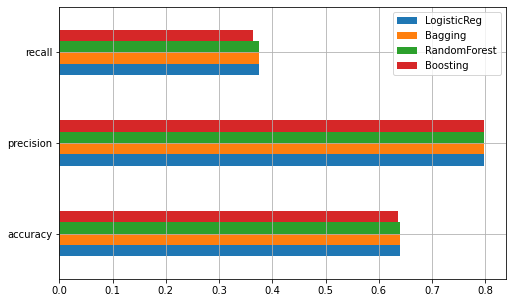

In [65]:
fig, ax = plt.subplots(figsize=(8,5))
metrics.plot(kind='barh', ax=ax)
ax.grid();

### Random Forest classifier with threshold of 0.01

In [66]:
y_pred_proba = RF.predict_proba(X_test)[:,1]
y_pred_test = (y_pred_proba >= 0.01).astype('int')
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print("Recall: ", 100*round(recall_score(y_pred=y_pred_test, y_true=y_test),2))
print("Precision: ", 100*round(precision_score(y_pred=y_pred_test, y_true=y_test),2))
CMatrix(CM)

Recall:  100.0
Precision:  50.0


PREDICTION,negative,positive,Total
TRUE,,,
negative,2,39616,39618
positive,0,39618,39618
Total,2,79234,79236


In [54]:
# Retraining with all the observations
RF_final = RandomForestClassifier(n_estimators=35, max_depth=20, random_state=12, max_features='sqrt',n_jobs=-1)
# 3. Use the trainning data to train the estimator
RF_final.fit(X,y)

RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=35,
                       n_jobs=-1, random_state=12)

In [55]:
# Making predictions
from collections import OrderedDict
symptoms = OrderedDict([('new_cough',  0), ('new_fever', 0), ('new_sore_throat', 1), ('new_shortness_of_breath', 0), ('new_head_ache', 0), ('test_indication_Contact with confirmed', 0)])

symptoms = pd.Series(symptoms).values.reshape(1,-1)

In [56]:
RF_final.predict(symptoms)

array([1], dtype=uint8)

Text(0.5, 1.0, 'Feature importances from Random Forest model')

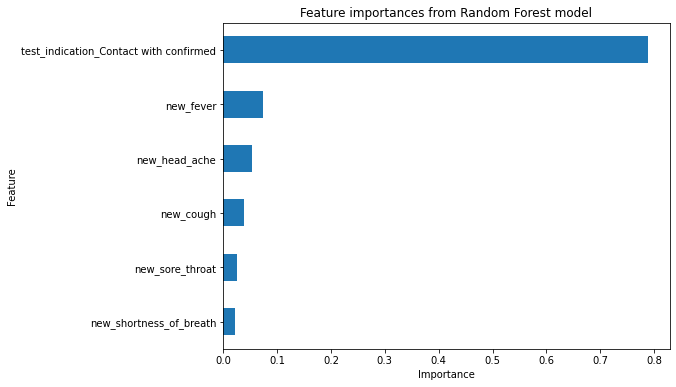

In [67]:
fig, ax = plt.subplots(figsize=(8,6))
feature_importances = pd.Series(data=RF.feature_importances_, index=topp_features)
feature_importances.sort_values().plot(kind='barh', ax=ax)
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature importances from Random Forest model')
#
# Payax.grid();